![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/04.4.Clinical_Deidentification_Improvement.ipynb)


# Clinical Deidentification Improvement

## Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.settings.enforce_versions=True
nlp.install(refresh_install=True)

In [ ]:
from johnsnowlabs import nlp, medical

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

In [5]:
spark

In [6]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only
import pandas as pd
import json
import string
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Healthcare NLP for Data Scientists Course

If you are not familiar with the components in this notebook, you can check [Healthcare NLP for Data Scientists Udemy Course](https://www.udemy.com/course/healthcare-nlp-for-data-scientists/) and the [MOOC Notebooks](https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/Spark_NLP_Udemy_MOOC/Healthcare_NLP) for each components.

# Deidentification NER models with Onto NER models

## deid models

Protected Health Information (PHI):  
- individual’s past, present, or future physical or mental health or condition
- provision of health care to the individual
- past, present, or future payment for the health care

Protected health information includes many common identifiers (e.g., name, address, birth date, Social Security Number) when they can be associated with the health information.

You can find more deidentification models and pretrained pipeline examples in this notebook:   [Clinical Deidentification Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.Clinical_DeIdentification.ipynb)

<center><b>Deidentification NER Models for English</b></center>

|index|model|lang|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|-----:|:-----|----|
| 1| [deidentify_dl](https://nlp.johnsnowlabs.com/2021/01/28/deidentify_dl_en.html)  |en| 7| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  |en| 13| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  |en|
| 2| [deidentify_large](https://nlp.johnsnowlabs.com/2020/08/04/deidentify_large_en.html)  |en| 8| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2021/06/30/ner_deid_generic_augmented_en.html)  |en| 14| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  |en|
| 3| [deidentify_rb](https://nlp.johnsnowlabs.com/2019/06/04/deidentify_rb_en.html)  |en| 9| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  |en| 15| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  |en|
| 4| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  |en| 10| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |en| 16| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |en|
| 5| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  |en| 11| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  |en| 17| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  |en|
| 6| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  |en| 12| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  |en| 18| []()|


## onto models

Onto models are Named Entity Recognition (or NER) models, meaning it annotates text to find features like the names of people, places, and organizations. Onto models were trained on the OntoNotes text corpus which is include these types of entities: `CARDINAL`, `DATE`, `EVENT`, `FAC`, `GPE`, `LANGUAGE`, `LAW`, `LOC`, `MONEY`, `NORP`, `ORDINAL`, `ORG`, `PERCENT`, `PERSON`, `PRODUCT`, `QUANTITY`, `TIME`, and `WORK_OF_ART`.


- [onto_100](https://nlp.johnsnowlabs.com/2020/02/03/onto_100_en.html)
- [onto_300](https://nlp.johnsnowlabs.com/2020/02/03/onto_300_en.html)
-[deberta_v3_base_token_classifier_ontonotes](https://nlp.johnsnowlabs.com/2022/05/06/deberta_v3_base_token_classifier_ontonotes_en_3_0.html)
-[deberta_v3_large_token_classifier_ontonotes](https://nlp.johnsnowlabs.com/2022/05/06/deberta_v3_large_token_classifier_ontonotes_en_3_0.html)
-[roberta_base_token_classifier_ontonotes](https://nlp.johnsnowlabs.com/2021/09/26/roberta_base_token_classifier_ontonotes_en.html)

## benchmark

A way to increase the accuracy of clinical de-identification models is to utilize various other models with similar entities.

In our test case, we made a pipeline which is include Onto NER and Deid NER models. Onto NER model containing entities such as `name`, `location`, `date`.

We support the de-identification model with the results of the onto NER model.

You can see the results of the ner_deid model vs multiple NER models pipeline in the metrics below.

image.png

## Create Pipeline

In [7]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
deid_ner_generic = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_deid")

ner_converter_deid = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_deid"])\
    .setOutputCol("ner_chunk_deid")

# deberta_v3_base_token_classifier_ontonotes
deid_ner_onto = nlp.DeBertaForTokenClassification.pretrained("deberta_v3_base_token_classifier_ontonotes", "en")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("ner_onto")\
    .setCaseSensitive(True)\
    .setMaxSentenceLength(512)

ner_converter_onto = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_onto"])\
    .setOutputCol("ner_chunk_onto")\
    .setWhiteList(["DATE","LOC","PERSON","TIME"])\
    .setReplaceLabels({"LOC": "LOCATION",
                       "PERSON": "NAME",
                       "TIME": "DATE"})

chunk_merge = medical.ChunkMergeApproach()\
    .setInputCols("ner_chunk_onto","ner_chunk_deid")\
    .setOutputCol("deid_merged_chunk")\
    .setMergeOverlapping(True)\
    .setChunkPrecedence("field")

nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        deid_ner_generic,
        ner_converter_deid,
        deid_ner_onto,
        ner_converter_onto,
        chunk_merge
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

light_model = nlp.LightPipeline(model)

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
deberta_v3_base_token_classifier_ontonotes download started this may take some time.
Approximate size to download 594.3 MB
[OK!]


In [8]:
# Downloading sample datasets.
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/mt_samples_10.csv

In [9]:
# mt_samples_df = spark.read.csv("mt_samples_10.csv", header=True)

mt_samples_df = spark.createDataFrame(pd.read_csv("./mt_samples_10.csv", sep=',', index_col=["index"]).reset_index())

In [10]:
text = mt_samples_df.collect()[7]["text"]

text

"Sample Type / Medical Specialty:\nHematology - Oncology\nSample Name:\nMetastatic Ovarian Cancer - Consult\nDescription:\nA very pleasant 66-year-old woman with recurrent metastatic ovarian cancer.\n(Medical Transcription Sample Report)\nREASON FOR CONSULTATION:\nMetastatic ovarian cancer.\nHISTORY OF PRESENT ILLNESS:\nMrs. ABCD is a very nice 66-year-old woman who is followed in clinic by Dr. X for history of renal cell cancer, breast cancer, as well as ovarian cancer, which was initially diagnosed 10 years ago, but over the last several months has recurred and is now metastatic. She last saw Dr. X in clinic towards the beginning of this month. She has been receiving gemcitabine and carboplatin, and she receives three cycles of this with the last one being given on 12/15/08. She was last seen in clinic on 12/22/08 by Dr. Y. At that point, her white count was 0.9 with the hemoglobin of 10.3, hematocrit of 30%, and platelets of 81,000. Her ANC was 0.5. She was started on prophylactic A

## Compare results

In [11]:
def get_df(light_result, chunk_col):

    chunks = []
    entities = []
    sentence= []
    begin = []
    end = []

    for n in light_result[0][chunk_col]:

        begin.append(n.begin)
        end.append(n.end)
        chunks.append(n.result)
        entities.append(n.metadata['entity'])
        sentence.append(n.metadata['sentence'])

    df_clinical = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end,
                                'sentence_id':sentence, 'entities':entities})

    return df_clinical

In [12]:
light_result = light_model.fullAnnotate(text)

In [13]:
df_ner_deid_result = get_df(light_result, chunk_col = "ner_chunk_deid")
df_ner_onto_result = get_df(light_result, chunk_col = "ner_chunk_onto")
df_ner_merged_result = get_df(light_result, chunk_col = "deid_merged_chunk")

In [14]:
from google.colab import widgets

t = widgets.TabBar(["deid_ner_generic", "deid_ner_onto", "deid_merged_ner"])

with t.output_to(0):
    display(df_ner_deid_result.head(20))

with t.output_to(1):
    display(df_ner_onto_result.head(20))

with t.output_to(2):
    display(df_ner_merged_result.head(25))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin   end sentence_id    entities
0          66-year-old    133   143           3         AGE
1          66-year-old    336   346           7         AGE
2             12/15/08    767   774           9        DATE
3             12/22/08    808   815          10        DATE
4                    Y    824   824          10        NAME
5             November   1148  1155          14        DATE
6           unit clerk   4341  4350          66  PROFESSION
7   XYZ Medical Center   4355  4372          66    LOCATION
8             12/25/08   7356  7363         114        DATE
9             November   7519  7526         114        DATE
10         66-year-old   7946  7956         119         AGE
11                   Y   9051  9051         130        NAME

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin   end sentence_id entities
0    Description    104   114           2     NAME
1        ILLNESS    302   308           6     NAME
2           ABCD    316   319           7     NAME
3            saw    587   589           8     DATE
4        towards    607   613           8     DATE
5         81,000    931   936          10     DATE
6      effusions   1071  1079          13     NAME
7         breath   1274  1279          15     NAME
8         breath   1465  1470          18     NAME
9      effusions   1536  1544          18     NAME
10        breath   1962  1967          22     NAME
11      hospital   2864  2871          31     DATE
12            At   2874  2875          31     DATE
13        follow   2920  2925          31     DATE
14  PAST MEDICAL   2984  2995          32     NAME
15       Anxiety   3467  3473          40     NAME
16       Chronic   3488  3494          41     NAME
17    neuropathy   3506  3515          41     NAME
18       Ongoing   3576  3582          42     NAME
19          PAST   3597  3600          43     NAME

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin   end sentence_id entities
0    Description    104   114           2     NAME
1    66-year-old    133   143           3      AGE
2        ILLNESS    302   308           6     NAME
3           ABCD    316   319           7     NAME
4    66-year-old    336   346           7      AGE
5            saw    587   589           8     DATE
6        towards    607   613           8     DATE
7       12/15/08    767   774           9     DATE
8       12/22/08    808   815          10     DATE
9              Y    824   824          10     NAME
10        81,000    931   936          10     DATE
11     effusions   1071  1079          13     NAME
12      November   1148  1155          14     DATE
13        breath   1274  1279          15     NAME
14        breath   1465  1470          18     NAME
15     effusions   1536  1544          18     NAME
16        breath   1962  1967          22     NAME
17      hospital   2864  2871          31     DATE
18            At   2874  2875          31     DATE
19        follow   2920  2925          31     DATE
20  PAST MEDICAL   2984  2995          32     NAME
21       Anxiety   3467  3473          40     NAME
22       Chronic   3488  3494          41     NAME
23    neuropathy   3506  3515          41     NAME
24       Ongoing   3576  3582          42     NAME

<IPython.core.display.Javascript object>

In [15]:
#from sparknlp_display import NerVisualizer

visualiser = nlp.viz.NerVisualizer()



t = widgets.TabBar(["deid_ner_generic", "deid_ner_onto", "deid_merged_ner"])

with t.output_to(0):
    visualiser.display(light_result[0], label_col='ner_chunk_deid', document_col='document')

with t.output_to(1):
    visualiser.display(light_result[0], label_col='ner_chunk_onto', document_col='document')

with t.output_to(2):
    visualiser.display(light_result[0], label_col='deid_merged_chunk', document_col='document')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

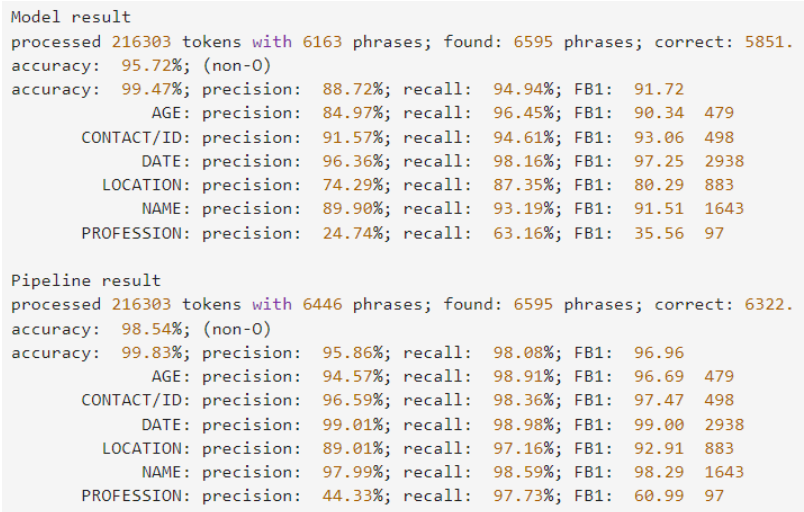

# Multi-Lingual Pretrained Models

## ner_deid_name_multilingual

<center>

  <b>Deidentification Multi-Lingual NER Models</b>



|index|model|lang|entities|embedding|
|----:|:----|----|--------|---------|
| 1| [ner_deid_name_multilingual](https://nlp.johnsnowlabs.com/2024/01/17/ner_deid_name_multilingual_xx.html)  |xx| `NAME` | xlm_roberta_base |
| 2| [ner_deid_name_multilingual_clinical](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_name_multilingual_clinical_xx.html)  |xx|  `NAME` | embedding_clinical |
| 3| [ner_deid_multilingual](https://nlp.johnsnowlabs.com/2024/02/12/ner_deid_multilingual_xx.html)  |xx|  `NAME`, `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `PROFESSION` | xlm_roberta_base |

</center>

In [18]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl","xx")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
deid_ner_generic = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner_generic")

deid_ner_generic_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "deid_ner_generic"])\
    .setOutputCol("deid_ner_generic_chunk")\
    .setWhiteList(["NAME"])\

xlm_roberta_embeddings = nlp.XlmRoBertaEmbeddings.pretrained("xlm_roberta_base", "xx") \
    .setInputCols("sentence", "token") \
    .setOutputCol("xlm_roberta_embeddings")\
    .setMaxSentenceLength(512)\
    .setCaseSensitive(False)\
    .setStorageRef("xlm_roberta_base")

deid_ner_multi = medical.NerModel.pretrained("ner_deid_name_multilingual", "xx", "clinical/models") \
    .setInputCols(["sentence", "token", "xlm_roberta_embeddings"]) \
    .setOutputCol("deid_ner_multi")

deid_ner_multi_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner_multi"]) \
    .setOutputCol("deid_ner_multi_chunk")

nlpPipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        deid_ner_generic,
        deid_ner_generic_converter,
        xlm_roberta_embeddings,
        deid_ner_multi,
        deid_ner_multi_converter,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

light_model = nlp.LightPipeline(model)

sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
xlm_roberta_base download started this may take some time.
Approximate size to download 622.5 MB
[OK!]
ner_deid_name_multilingual download started this may take some time.
[OK!]


In [19]:
text_list = [
    """Record date: 2093-01-13, David Hale, M.D., Name: Hendrickson, Ora MR. # 7194334 Date: 01/13/93 PCP: Oliveira, 25 years old, Record date: 1-11-2000. Cocke County Baptist Hospital. 0295 Keats Street. Phone +1 (302) 786-5227. The patient's complaints first surfaced when he started working for Brothers Coal-Mine.""",
    """J'ai vu en consultation Michel Martinez (49 ans) adressé au Centre Hospitalier De Plaisir pour un diabète mal contrôlé avec des symptômes datant de Mars 2015.""",
    """Michael Berger wird am Morgen des 12 Dezember 2018 ins St. Elisabeth-Krankenhaus in Bad Kissingen eingeliefert. Herr Berger ist 76 Jahre alt und hat zu viel Wasser in den Beinen.""",
    """Ho visto Gastone Montanariello (49 anni) riferito all' Ospedale San Camillo per diabete mal controllato con sintomi risalenti a marzo 2015.""",
    """Antonio Miguel Martínez, un varón de 35 años de edad, de profesión auxiliar de enfermería y nacido en Cadiz, España. Aún no estaba vacunado, se infectó con Covid-19 el dia 14 de Marzo y tuvo que ir al Hospital. Fue tratado con anticuerpos monoclonales en la Clinica San Carlos.""",
    """Detalhes do paciente. Nome do paciente:  Pedro Gonçalves NHC: 2569870. Endereço: Rua Das Flores 23. Cidade/ Província: Porto. Código Postal: 21754-987. Dados de cuidados. Data de nascimento: 10/10/1963. Idade: 53 anos Sexo: Homen Data de admissão: 17/06/2016. Doutora: Maria Santos""",
    """Spitalul Pentru Ochi de Deal, Drumul Oprea Nr. 972 Vaslui, 737405 România. Tel: +40(235)413773. Data setului de analize: 25 May 2022 15:36:00. Nume si Prenume : BUREAN MARIA, Varsta: 77. Medic : Agota Evelyn Tımar. C.N.P : 2450502264401"""
]


In [20]:
light_result = light_model.fullAnnotate(text_list)

In [21]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

from google.colab import widgets

t = widgets.TabBar(["deid_ner_generic", "deid_ner_multi"])

with t.output_to(0):
  for i in range(len(text_list)):
    visualiser.display(light_result[i], label_col='deid_ner_generic_chunk', document_col='document')

with t.output_to(1):
  for i in range(len(text_list)):
    visualiser.display(light_result[i], label_col='deid_ner_multi_chunk', document_col='document')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ner_deid_multilingual

In [22]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("word_embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
deid_ner_generic = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("deid_ner_generic")

deid_ner_generic_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "deid_ner_generic"])\
    .setOutputCol("deid_ner_generic_chunk")\

xlm_roberta_embeddings = nlp.XlmRoBertaEmbeddings.pretrained("xlm_roberta_base", "xx") \
    .setInputCols("sentence", "token") \
    .setOutputCol("xlm_roberta_embeddings")\
    .setMaxSentenceLength(512)\

ner_deid_multilingual = medical.NerModel.pretrained("ner_deid_multilingual", "xx", "clinical/models") \
    .setInputCols(["sentence", "token", "xlm_roberta_embeddings"]) \
    .setOutputCol("ner_deid_multilingual")

ner_deid_multilingual_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_deid_multilingual"]) \
    .setOutputCol("ner_deid_multilingual_chunk")

nlpPipeline = nlp.Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        deid_ner_generic,
        deid_ner_generic_converter,
        xlm_roberta_embeddings,
        ner_deid_multilingual,
        ner_deid_multilingual_converter
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

light_model = nlp.LightPipeline(model)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
xlm_roberta_base download started this may take some time.
Approximate size to download 622.5 MB
[OK!]
ner_deid_multilingual download started this may take some time.
[OK!]


In [23]:
light_result = light_model.fullAnnotate(text_list)

In [24]:
df_deid_ner_generic_result = get_df(light_result, chunk_col = "deid_ner_generic_chunk")
df_ner_deid_multilingual_result = get_df(light_result, chunk_col = "ner_deid_multilingual_chunk")

In [25]:
from google.colab import widgets

t = widgets.TabBar(["deid_ner_generic", "ner_deid_multilingual"])

with t.output_to(0):
    display(df_deid_ner_generic_result.head(50))

with t.output_to(1):
    display(df_ner_deid_multilingual_result.head(50))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin  end sentence_id  entities
0                      2093-01-13     13   22           0      DATE
1                      David Hale     25   34           0      NAME
2                Hendrickson, Ora     49   64           0      NAME
3                         7194334     72   78           0        ID
4                        01/13/93     86   93           0      DATE
5                        Oliveira    100  107           0      NAME
6                              25    110  111           0       AGE
7                       1-11-2000    137  145           0      DATE
8   Cocke County Baptist Hospital    148  176           1  LOCATION
9               0295 Keats Street    179  195           2  LOCATION
10                 (302) 786-5227    207  220           3   CONTACT
11             Brothers Coal-Mine    291  308           4  LOCATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin  end sentence_id    entities
0      2093-01-13     13   22           0        DATE
1      David Hale     25   34           0        NAME
2     Hendrickson     49   59           0        NAME
3         7194334     72   78           0          ID
4        01/13/93     86   93           0        DATE
5        Oliveira    100  107           0        NAME
6       1-11-2000    137  145           0        DATE
7  County Baptist    154  167           1  PROFESSION
8    Keats Street    184  195           2    LOCATION

<IPython.core.display.Javascript object>

In [26]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

t = widgets.TabBar(["deid_ner_generic", "ner_deid_multilingual"])

with t.output_to(0):
  for i in range(len(text_list)):
    visualiser.display(light_result[i], label_col='deid_ner_generic_chunk', document_col='document')

with t.output_to(1):
  for i in range(len(text_list)):
    visualiser.display(light_result[i], label_col='ner_deid_multilingual_chunk', document_col='document')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📄 New Features After 6.0.0

This section provides an overview of the latest updates and improvements in the **De-identification** models and pipelines released **after version 6.0.0** of the **Healthcare NLP** library.

It highlights key enhancements, new functionalities, and performance improvements that have been introduced in recent releases, helping users understand the evolution of the de-identification capabilities.

## ✨ Objectives
- Summarize important changes in de-identification models and pipelines.
- Demonstrate new features with practical examples.
- Help users easily adopt the latest advancements for their anonymization workflows.

> **Note:** This notebook assumes that you are already familiar with the basic usage of John Snow Labs NLP and de-identification pipelines.

⚠️ Please make sure to run this notebook with Healthcare NLP version 6.3.0 or higher, as some features used here are not available in earlier releases.

##Pipeline Initial

In [27]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector() \
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

labels =["AGE", "DATE", "HOSPITAL", "CITY", "STREET", "STATE", "PHONE", "ZIP", "PROFESSION", "NAME", "COUNTRY"]

pretrained_zero_shot_ner = medical.PretrainedZeroShotNER.pretrained("zeroshot_ner_deid_subentity_merged_large", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("ner")\
    .setPredictionThreshold(0.5)\
    .setLabels(labels)

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")



zeroshot_ner_deid_subentity_merged_large download started this may take some time.
[OK!]


## GroupBy Mechanism

**`groupByCol`**

A new capability has been added to support consistent obfuscation within groups using the `groupByCol` parameter in conjunction with `consistentObfuscation` and `ConsistentAcrossNameParts`.

- The `groupByCol` parameter allows partitioning the dataset into groups based on the values of a specified column.
- When used with `consistentObfuscation=True`, it ensures consistent entity replacements within each group (e.g., per document or per patient).
- **Default:** `""` (empty string) — grouping is disabled.
- **Type:** Must be a valid column of type `StringType` in the input DataFrame.
- The specified column must exist in the input data and must be of type `StringType`.
- Using this parameter may affect the row order of the dataset.
- This feature is **not supported** in `LightPipeline`.

In [28]:
from pyspark.sql.types import StructType, StructField, StringType

data = [
    ("file_1", "Patient John Doe visited on 2024-09-12 with complaints of chest pain. John Doe "),
    ("file_1", "Johm Doe was seen at St. Mary's Hospital in Boston. John Doe "),
    ("file_2", "Johm Doe has blood test results on 2025-01-05 were abnormal."),
    ("file_2", "Patient ID 8843921 experienced nausea and dizziness. John Doe "),
    ("file_3", "Michael Johnson was diagnosed with hypertension in New York."),
    ("file_4", "Maria Garcia came to the clinic on 2023-12-20 for a routine checkup."),
    ("file_4", "Contact number listed as (555) 123-4567."),
    ("file_4", "A follow-up was scheduled using the email maria.garcia@example.com, with a call planned for 2023-12-20."),
]

schema = StructType([
    StructField("id", StringType(), True),
    StructField("text", StringType(), True),
])


deidentification = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setConsistentObfuscation(True)\
    .setGroupByCol("id")

In [29]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

df = spark.createDataFrame(data, schema=schema)

model = nlpPipeline.fit(df)
result = model.transform(df)

In [30]:
result.withColumn("id_array", F.array_repeat(F.col("id"), F.size(F.col("sentence.result")))) \
      .withColumn("sentence_result", F.col("sentence.result")) \
      .withColumn("deidentified_result", F.col("deidentified.result")) \
      .select(F.explode(
          F.arrays_zip("id_array", "sentence_result", "deidentified_result")
      ).alias("cols")) \
      .select(
          F.col("cols.id_array").alias("id"),
          F.col("cols.sentence_result").alias("sentence"),
          F.col("cols.deidentified_result").alias("deidentified")
      ).toPandas()


id                                           sentence  \
0   file_1  Patient John Doe visited on 2024-09-12 with co...   
1   file_1                                           John Doe   
2   file_1  Johm Doe was seen at St. Mary's Hospital in Bo...   
3   file_1                                           John Doe   
4   file_2  Johm Doe has blood test results on 2025-01-05 ...   
5   file_2  Patient ID 8843921 experienced nausea and dizz...   
6   file_2                                           John Doe   
7   file_3  Michael Johnson was diagnosed with hypertensio...   
8   file_4  Maria Garcia came to the clinic on 2023-12-20 ...   
9   file_4           Contact number listed as (555) 123-4567.   
10  file_4  A follow-up was scheduled using the email mari...   

                                         deidentified  
0   Patient Veleta Shock visited on <DATE> with co...  
1                                        Veleta Shock  
2   Balinda Shock was seen at Hiawatha Community H...  
3                                        Veleta Shock  
4   Balinda Shock has blood test results on <DATE>...  
5   Patient ID MAURENE experienced nausea and dizz...  
6                                        Veleta Shock  
7   Hope Knee was diagnosed with hypertension in T...  
8   Valaria More came to the clinic on <DATE> for ...  
9            Contact number listed as (000) 432-1098.  
10  A follow-up was scheduled using the email belé...

## Inferring Missing PHI Entities via Previously Detected NER Outputs Within Deidentification

**`setChunkMatching`**

This feature allows chunks like "NAME" and "DATE" to be inferred in contexts where they are not directly detected by NER, by referencing previously identified chunks within the same group. For example, if "NAME" was identified earlier in the document, similar text later in the group can be tagged accordingly—even if the NER model missed it due to lack of context.

- **`setChunkMatching({entity: threshold})`** enables chunk-level entity inference across multiple rows.
- Especially useful when entity annotations (e.g., `"NAME"`, `"DATE"`) are partially missing but present in other rows of the same group.
- Requires `setGroupByCol("your_grouping_column")` for context-based propagation.

***Before Chunk Matching:***

In [31]:
text = """
Created On : 10/22/2024 1:21PM Electronically Reviewed by: Kelly Goetz, M.A. on DOB 10/22/2024.Performed on Oct 22, 2024 12:48.
"""

deidentification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "sentence"]) \
    .setOutputCol("deidentified") \
    .setMode("masked")


In [32]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [33]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0  Created On : 10/22/2024 1:21PM Electronically ...   

                                        deidentified  
0  Created On : <DATE> 1:21PM Electronically Revi...

***After Chunk Matching:***

In [34]:
deidentification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "sentence"]) \
    .setOutputCol("deidentified") \
    .setMode("masked") \
    .setChunkMatching({"NAME": 0.50, "DATE": 0.50})

In [35]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [36]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0  Created On : 10/22/2024 1:21PM Electronically ...   

                                        deidentified  
0  Created On : <DATE> 1:21PM Electronically Revi...

## Improved Name Consistency Handling in Deidentification

We have improved the way fake names are generated and assigned during the de-identification (De-ID) process. Previously, name tokens (e.g., first name and last name) were treated as a single chunk when generating a fake name. Now, each component of a name (first name, middle name, last name, etc.) is processed individually and then recombined into a full fake name. This enhancement allows for more consistent obfuscation within documents, even when only partial name mentions appear (e.g., "John Smith" vs. "Mr. Smith"). As a result, the same fake name components will be used throughout a document for the same real-world identity, improving coherence and readability while preserving privacy.

Note: This change may lead to different fake name outputs compared to previous versions, especially for historical data. If users would like to retain the previous behavior (treating the full name as a single chunk and relying on previously generated fake names from earlier versions), they can set the corresponding configuration parameter to False.

The ConsistentAcrossNameParts parameter controls whether name obfuscation is applied consistently across different parts of a name entity, even when they appear separately in the text.

- **`ConsistentAcrossNameParts` (default: `True`)** ensures that all parts of a name entity (e.g., first name, last name) are consistently obfuscated, even when they appear separately in the text.

Behavior

- **When set to `True`**:
  - Full names and their individual components are mapped consistently.
  - Example:
    - "John Smith" → "Liam Brown"
    - "John" → "Liam"
    - "Smith" → "Brown"

In [37]:
text ="""
John Smith met with Sarah Johnson at the conference last week.
During the event, John gave a presentation on data privacy, while Smith answered questions from the audience.
Sarah was later seen speaking with Michael Lee and Dr. Johnson during a panel discussion.
Interestingly, both Sarah and Michael mentioned that Smith's insights were particularly valuable.
Later that day, John, Sarah, and Michael attended a private dinner hosted by Dr. Lee.
"""

In [38]:
deidentification = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("obfuscate")\
      .setConsistentAcrossNameParts(True)

nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [39]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0  John Smith met with Sarah Johnson at the confe...   
1  During the event, John gave a presentation on ...   
2  Sarah was later seen speaking with Michael Lee...   
3  Interestingly, both Sarah and Michael mentione...   
4  Later that day, John, Sarah, and Michael atten...   

                                        deidentified  
0  Renella Lodge met with Wilhelmena Romano at th...  
1  During the event, Renella gave a presentation ...  
2  Wilhelmena was later seen speaking with Adell ...  
3  Interestingly, both Wilhelmena and Adell menti...  
4  Later that day, Renella, Wilhelmena, and Adell...

## Geographical Obfuscation for Location Entities

A new parameter `setGeoConsistency(True)` has been introduced in the `DeIdentification` annotator to ensure **realistic and coherent obfuscation of geographic entities**. This feature guarantees that obfuscated addresses make sense by maintaining valid combinations between:
    - `state`
    - `city`
    - `zip`
    - `street`
    - `phone`

When enabled, the system intelligently selects related fake address components from a unified pool using a deterministic algorithm. This prevents nonsensical combinations like `"New York City, California, ZIP 98006"` by enforcing priority-based mapping across geographic types.

- Priority Order for Consistent Mapping
    1. **State** (highest priority)
    2. **City**
    3. **Zip code**
    4. **Street**
    5. **Phone** (lowest priority)

- Language Requirement
This feature is available only when:
    - `setGeoConsistency(True)` **is enabled**
    - `setLanguage("en")` **is set**

For all non-English languages, the feature is ignored (for now).

- Interaction with Other Parameters
Enabling `geoConsistency` will automatically override:
    - `keepTextSizeForObfuscation`
    - `consistentObfuscation` on some address entities
    - any file-based faker settings

This ensures full control over the address pool for geographic coherence and we plan to improve this feature further with user feedbacks for a seamless experience.

- **Country Obfuscation Control**

Previously, country entities were **always obfuscated** by default in `DeIdentification`.  
Now, country obfuscation is **explicitly controlled** via the new parameter:

If set to True, country names will be obfuscated.  
If set to False (default), country names will be preserved.

In [40]:
text = """
Patient Medical Record
Patient Name: Sarah Johnson

Patient Demographics and Contact Information
Primary Address:
1247 Maple Street
Austin, Texas 78701
USA
Contact Information:
Primary Phone: (512) 555-0198
"""

***Before Geographical Obfuscation:***

In [41]:
deidentification = medical.DeIdentification() \
            .setInputCols(["ner_chunk", "token", "sentence"]) \
            .setOutputCol("deid_without_geo_consistency") \
            .setMode("obfuscate") \
            .setGeoConsistency(False) \
            .setCountryObfuscation(False) \
            .setSeed(10)


In [42]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [43]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deid_without_geo_consistency.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deid_without_geo_consistency"),).toPandas()

sentence  \
0  Patient Medical Record\nPatient Name: Sarah Jo...   

                        deid_without_geo_consistency  
0  Patient Medical Record\nPatient Name: Amanda S...

***After Geographical Obfuscation:***

In [44]:
deidentification = medical.DeIdentification() \
            .setInputCols(["ner_chunk", "token", "sentence"]) \
            .setOutputCol("deid_with_geo_consistency") \
            .setMode("obfuscate") \
            .setGeoConsistency(True) \
            .setCountryObfuscation(False) \
            .setSeed(10)

In [45]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification

])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [46]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deid_with_geo_consistency.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deid_with_geo_consistency"),).toPandas()

sentence  \
0  Patient Medical Record\nPatient Name: Sarah Jo...   

                           deid_with_geo_consistency  
0  Patient Medical Record\nPatient Name: Amanda S...

## Custom Date Format Support for Date Obfuscation

- **Added** support for `additionalDateFormats` parameter to allow specifying custom date formats in addition to the built-in `dateFormats`.

This enables more flexible parsing and obfuscation of non-standard or region-specific date patterns.

In [47]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A002', 'A003'],
     'text' : ['Chris Brown was discharged on 10/02/2022',
               'John was discharged on 03 Apr2022',
               'John Moore was discharged on 11/May-2025'
              ],
    }
)

my_input_df = spark.createDataFrame(data)

In [48]:
my_input_df.show(truncate=False)

+---------+----------------------------------------+
|patientID|text                                    |
+---------+----------------------------------------+
|A001     |Chris Brown was discharged on 10/02/2022|
|A002     |John was discharged on 03 Apr2022       |
|A003     |John Moore was discharged on 11/May-2025|
+---------+----------------------------------------+



In [49]:
deidentification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "sentence"]) \
    .setOutputCol("deid_text_obs") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setAdditionalDateFormats(["dd MMMyyyy", "dd/MMM-yyyy"])\
    .setRegion('us') \
    .setUnnormalizedDateMode("skip")




In [50]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification
])

result = nlpPipeline.fit(my_input_df).transform(my_input_df)

In [51]:
result.select('text','deid_text_obs.result').show(truncate = False)

+----------------------------------------+---------------------------------------------+
|text                                    |result                                       |
+----------------------------------------+---------------------------------------------+
|Chris Brown was discharged on 10/02/2022|[Catha Lipoma was discharged on 10/29/2022]  |
|John was discharged on 03 Apr2022       |[Lenor was discharged on 30 Apr2022]         |
|John Moore was discharged on 11/May-2025|[Lenor Backers was discharged on 07/Jun-2025]|
+----------------------------------------+---------------------------------------------+



## Static and File-Based Obfuscation Pair Support in `De-Identification`

- **Added** `setStaticObfuscationPairs`: allows users to define static `[original, entityType, fake]` triplets directly in code for deterministic obfuscation.
- **Added** `setStaticObfuscationPairsResource`: allows loading obfuscation triplets from an external file (e.g., CSV). Supports custom delimiter through the `options` parameter.

This feature is especially useful in **VIP or high-profile patient** scenarios, where specific sensitive names or locations must always be replaced in a controlled and reproducible way.  


In [52]:
text = """John Smith visited Los Angeles. He was admitted to the emergency department at St. Mary's Hospital after experiencing chest pain. His mother worked as a Nurse  """


In [53]:
# Define pairs in code
pairs = [
    ["John Smith", "PATIENT", "Andrew Snow"],
    ["John Smith", "NAME", "Andrew Snow"],
    ["Los Angeles", "CITY", "New York City"],
    ["Los Angeles", "LOCATION", "New York City"],
    ["St. Mary's Hospital", "HOSPITAL", "Johns Hopkins Hospital"],
    ["Nurse", "PROFESSION", "Healthworker"]
]

deid = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate") \
    .setStaticObfuscationPairs(pairs)

In [54]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deid

])

empty_data = spark.createDataFrame([[""]]).toDF("text")

obfuscation_model = nlpPipeline.fit(empty_data)

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [55]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0                    John Smith visited Los Angeles.   
1  He was admitted to the emergency department at...   
2                       His mother worked as a Nurse   

                                        deidentified  
0                 Andrew Snow visited New York City.  
1  He was admitted to the emergency department at...  
2                His mother worked as a Healthworker

## Support for obfuscation equivalents to normalize entity variants in DeIdentification (e.g. Robert vs Rob will be treated same)

A new **feature** has been added to support defining *obfuscation equivalents* — enabling consistent replacement of variant forms of the same entity during de-identification.

**Use case examples:**
- `"Alex"` and `"Alexander"` → always mapped to the same obfuscated value under `"NAME"`
- `"CA"` and `"Calif."` → normalized to `"California"` under `"STATE"`

**How it works:**
- Accepts a list of string triplets: `[variant, entityType, canonical]`
- Both `variant` and `entityType` are **case-insensitive**
- Ensures consistent and semantically aligned obfuscation across documents

In [56]:
text ="""
Record date: 2023-03-08. The patient, Jennifer Thompson, is 63 years old.
Dr. Elizabeth Carter, from Downtown Health Center in New York, NY, 10027, Phone: 212-123-4567.
Dr. Liz discharged Jenny on 2023-03-08. Her medical record number is 77881234.
"""

equvalent_list = [
    ["Alex", "NAME", "Alexander"],
    ["Jenny", "NAME", "Jennifer"],
    ["Liz", "NAME", "Elizabeth"],
    ["CA", "LOCATION", "California"],
    ["NY", "CITY", "New York"]
]
deidentification = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscationEquivalents(equvalent_list)\
    .setSeed(103)\
    .setGenderAwareness(True)

In [57]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [58]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0                           Record date: 2023-03-08.   
1   The patient, Jennifer Thompson, is 63 years old.   
2  Dr. Elizabeth Carter, from Downtown Health Cen...   
3            Dr. Liz discharged Jenny on 2023-03-08.   
4             Her medical record number is 77881234.   

                                        deidentified  
0                               Record date: <DATE>.  
1       The patient, Maryl Gallant, is 75 years old.  
2  Dr. Rosanne Grand, from Doctors Specialty Hosp...  
3            Dr. Rosanne discharged Maryl on <DATE>.  
4             Her medical record number is 44330987.

## Deterministic fallback for missing Date shifts in DeIdentification

A new utility has been added to **automatically fill missing or empty values** in a date shift column using a **deterministic, ID-based pseudo-random fallback**.

This feature is especially useful in **de-identification pipelines** where:

- Date shifts must be **consistent per ID**
- Some rows have **null or missing shift values**

**Logic:**

- If another row with the same `ID` has a shift value, it is **reused**
- If no shift exists for that ID, a fallback shift is **generated using a deterministic hash function** based on the `ID` and a fixed seed
- Fallback shifts are **always within the range** `[1, maxShiftDays]`

In [63]:
import pandas as pd
data = pd.DataFrame(
    {'patientID' : ['A001', 'A002', 'A001', 'A002', 'A003', 'A003'],
     'text' : [
         'Chris Brown was discharged on 10/02/2022',
          'Mark White was discharged on 03/01/2020',
          'Chris Brown was born on 05/10/1982',
          'Mark White was born on 10/04/2000',
          'John was discharged on 03/15/2022',
          'John Moore was born on 12/31/2002'
      ],
     'dateshift' : ['10', '-2', None, None, None, 5]
    }
)
input_df = spark.createDataFrame(data)

In [66]:
from sparknlp_jsl.utils import DateShiftFiller

filler = DateShiftFiller(spark, seed=42, max_shift_days=60)
result = filler.fill_missing_shifts(input_df, id_col="patientID",
                                       shift_col="dateshift", suffix="_filled")

In [67]:
result.show(truncate=False)

+---------+----------------------------------------+---------+----------------+
|patientID|text                                    |dateshift|dateshift_filled|
+---------+----------------------------------------+---------+----------------+
|A001     |Chris Brown was discharged on 10/02/2022|10       |10              |
|A002     |Mark White was discharged on 03/01/2020 |-2       |-2              |
|A001     |Chris Brown was born on 05/10/1982      |null     |10              |
|A002     |Mark White was born on 10/04/2000       |null     |-2              |
|A003     |John was discharged on 03/15/2022       |null     |5               |
|A003     |John Moore was born on 12/31/2002       |5        |5               |
+---------+----------------------------------------+---------+----------------+



## New Masking Policies for Entity Redaction in `De-Identification`

- Introduced `same_length_chars_without_brackets` masking policy: masks entities with asterisks of the same length **without square brackets**.
- Introduced `entity_labels_without_brackets` masking policy: replaces entities with their label **without square brackets**.

In [68]:
text ="""
Record date: 2023-03-08. The patient, Jennifer Thompson, is 63 years old.
Dr. Elizabeth Carter, from Downtown Health Center in New York, NY, 10027, Phone: 212-123-4567.
Dr. Liz discharged Jenny on 2023-03-08. Her medical record number is 77881234.
"""

deid_entity_labels = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels_without_brackets")

deid_same_length = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars_without_brackets")

deid_fixed_length = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)

In [69]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deid_entity_labels,
        deid_same_length,
        deid_fixed_length
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [70]:
result.select(F.explode(F.arrays_zip(result.deid_entity_label.result,
                                     result.deid_same_length.result,
                                     result.deid_fixed_length.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("deid_entity_label"),
              F.expr("cols['1']").alias("deid_same_length"),
              F.expr("cols['2']").alias("deid_fixed_length"),).toPandas()

deid_entity_label  \
0                                 Record date: DATE.   
1               The patient, NAME, is AGE years old.   
2  Dr. NAME, from HOSPITAL in CITY, STATE, ZIP, P...   
3                  Dr. NAME discharged NAME on DATE.   
4                Her medical record number is PHONE.   

                                    deid_same_length  \
0                           Record date: **********.   
1   The patient, *****************, is ** years old.   
2  Dr. ****************, from *******************...   
3            Dr. *** discharged ***** on **********.   
4             Her medical record number is ********.   

                                   deid_fixed_length  
0                                 Record date: ****.  
1              The patient, ****, is **** years old.  
2  Dr. ****, from **** in ****, ****, ****, Phone...  
3                  Dr. **** discharged **** on ****.  
4                 Her medical record number is ****.

## Improved Case Sensitivity for Fake Data Generation in `De-Identification`

- **Enhancement:** Fake values generated during obfuscation now respect the original text's casing by default.
- This ensures that fake data matches the case style (lowercase, uppercase, mixed case) of the input entities for more natural and consistent masking results.


In [71]:
text = """
Record date : 2093-01-13 , david hale , M.D . , Name : MARIA , Ora MR # 7194334 Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 .
"""

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker")

In [72]:
nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        pretrained_zero_shot_ner,
        ner_converter,
        deidentification
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [73]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified"),).toPandas()

sentence  \
0      Record date : 2093-01-13 , david hale , M.D .   
1  , Name : MARIA , Ora MR # 7194334 Date : 01/13...   
2  Patient : Oliveira, 25 years-old , Record date...   

                                        deidentified  
0         Record date : <DATE> , walls lisle , M.D .  
1     , Name : ELMO Nab MR # 4027887 Date : <DATE> .  
2  Patient : Charleston, 35 years-old , Record da...

## Selective Obfuscation Source Configuration in `De-Identification`

Introduced the `setSelectiveObfuscateRefSource()` method to allow **per-entity customization** of obfuscation sources.  
This enables users to specify different obfuscation strategies (e.g., `'faker'`, `'custom'`, `'file'`, `'both'`) for different entity types.  
If an entity is not explicitly configured in this dictionary, the global `obfuscateRefSource` setting will be used as a fallback.


In [74]:
selective_obfuscate_ref_source = {"Drug": "file", "state": "both"}

de_identification = medical.DeIdentification() \
            .setInputCols(["token", "sentence","ner_chunk"]) \
            .setOutputCol("obfuscated") \
            .setObfuscateRefSource("faker") \
            .setMode("obfuscate") \
            .setSelectiveObfuscateRefSource(selective_obfuscate_ref_source)

### Dictionary Support for `Deidentification` with `setSelectiveObfuscationModes` Parameter

Added support for **dictionary input** in the `setSelectiveObfuscationModes` method, allowing more flexible configuration of obfuscation modes for specific entities or contexts.


In [75]:
sample_json = {
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID", "NAME"],
	"skip": ["DATE"],
	"mask_same_length_chars":["location"],
	"mask_fixed_length_chars":["zip"]
}

deid_doc = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask")\
    .setSameLengthFormattedEntities(["PHONE"])\
    .setFixedMaskLength(2)\
    .setSelectiveObfuscationModes(sample_json)